### Classification using Decision Trees


Heart Disease Databases (Cleveland database)
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

###### Preparing datasets

In [2]:
col_names = ["age", "sex", "cp", "trestbps", "chol","fbs", "restecg", "thalach","exang", "oldpeak","slope", "ca", "thal", "status"]
df = pd.read_csv("Datasets/processed.cleveland.csv", names=col_names)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
# Checking if any Nans are present
df.isna().values.any()

False

In [4]:
# Selecting rows (and their indexes) with "?" value
df[df.values == '?']
print(list(df[df.values == '?'].index))

# Dropping rows with "?" from df
df = df.drop(list(df[df.values == '?'].index))
df.tail()

[87, 166, 192, 266, 287, 302]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,status
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [5]:
# Comvering target variable into a  binary one - "0" (normal) and "1" (abnormal)
df["status"] = np.where(df["status"] > 0, 1, 0)
df["status"].values[0:20]

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

Text(0.5, 1.0, 'Histogram')

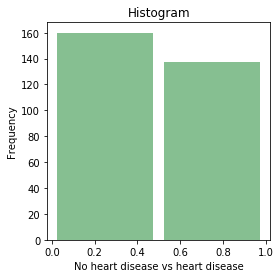

In [6]:
# Plotting a histrogram for status
df.hist(column="status", bins=2, grid=False, figsize=(4,4), color='#86bf91', rwidth=0.9)
plt.ylabel('Frequency')
plt.xlabel('No heart disease vs heart disease')
plt.title('Histogram')

In [7]:
# Specyfing predictor and target variables in training and test data sets
y = df.status
X = df.iloc[:,0:13]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

207
90
207
90


### Creating tree objects

Preprating two classification models to compare the algorithms for categorical target variable: Gini and Entropy (Information gain).

#### Gini algorithm

Gini Index is a measure of total variance across all the classes in the predictor variable. 

Smaller Gini values --> higher the homogeneity of a node (purer group).

The algorithm assumes that the target variable is categorical and performs only binary splits.


Calculate Gini for a split:
1. First calculate Gini for sub-nodes by summing squares of probability for success (p) and failure (q): p^2 + q^2.
2. Then, calculate Gini for split using weighted Gini result for each node of that split.


### Calculations for sample nodes
###### Split on "sex"

In [8]:
f_total = df["sex"][df["sex"]==0.0].count()
f_abnormal = df["status"][((df["sex"]==0.0) & (df["status"]==1))].sum()

m_total = len(df) - f_total
m_abnormal = df["status"][((df["sex"]==1.0) & (df["status"]==1))].sum()

n_samples = len(df)
abnormal = df["status"][(df["status"]==1)].sum()

print("Total # female: ", f_total)
print("Total # male: ", m_total)
print("Total # female with heart disease: ", f_abnormal)
print("Total # male with heart disease: ", m_abnormal)
print("Total # female & male:", n_samples)
print("Total # patients with heart disease:", abnormal)

# 1. Gini for sub-node Female
gini_f = (f_abnormal/f_total)**2 +(1-(f_abnormal)/f_total)**2
# 2. Gini for sub-node Male
gini_m =(m_abnormal/m_total)**2 +(1-(m_abnormal)/m_total)**2
# 3. Weighted Gini for Split Gender
gini_sex_weighted = (f_total/n_samples)*gini_f + (m_total/n_samples)*gini_m 

print("Gini for sub-node Female: ", round(gini_f, 3))
print("Gini for sub-node Male: ", round(gini_m, 3))
print("Weighted Gini for Split Gender: ", round(gini_sex_weighted, 3))
print("Information gain: ", round((1-gini_sex_weighted), 3))

Total # female:  96
Total # male:  201
Total # female with heart disease:  25
Total # male with heart disease:  112
Total # female & male: 297
Total # patients with heart disease: 137
Gini for sub-node Female:  0.615
Gini for sub-node Male:  0.507
Weighted Gini for Split Gender:  0.542
Information gain:  0.458


###### Split on "fbs"
fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)

In [9]:
low_sugar = df["fbs"][df["fbs"]==0.0].count()
low_sugar_abnormal = df["status"][((df["fbs"]==0.0) & (df["status"]==1))].sum()

high_sugar = len(df) - low_sugar
high_sugar_abnormal = df["fbs"][((df["fbs"]==1.0) & (df["status"]==1))].sum()

n_samples = len(df)

print("Total # for low_sugar: ", low_sugar)
print("Total # for high_sugar: ", high_sugar)
print("Total # for low_sugar & heart disease: ", low_sugar_abnormal)
print("Total # for high_sugar & heart disease: ", high_sugar_abnormal)
print("# samples:", n_samples)


# 1. Gini for sub-node fbs < 120 mg/dl
gini_low = (low_sugar_abnormal/low_sugar)**2 +(1-(low_sugar_abnormal/low_sugar))**2
# 2. Gini for sub-node fbs > 120 mg/dl
gini_high =(high_sugar_abnormal/high_sugar)**2 +(1-(high_sugar_abnormal/high_sugar))**2
# 3. Weighted Gini for Split fbs
gini_fbs_weighted = (low_sugar/n_samples)*gini_low + (high_sugar/n_samples)*gini_high

print("Gini for sub-node fbs < 120 mg/dl: ", round(gini_low,3))
print("Gini for sub-node fbs > 120 mg/dl: ", round(gini_high,3))
print("Weighted Gini for Split fbs: ", round(gini_fbs_weighted,3))
print("Information gain: ", round((1-gini_fbs_weighted), 3))

Total # for low_sugar:  254
Total # for high_sugar:  43
Total # for low_sugar & heart disease:  117
Total # for high_sugar & heart disease:  20.0
# samples: 297
Gini for sub-node fbs < 120 mg/dl:  0.503
Gini for sub-node fbs > 120 mg/dl:  0.502
Weighted Gini for Split fbs:  0.503
Information gain:  0.497


Splitting on "fasting blood sugar" gives us slightly better results (smaller Gini indexes) which means that nodes splitted by "fbs" are more homogeneous than splitted by "sex".

### Creating tree objects using sklearn

In [25]:
model_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth = 3)

# max_depth is a way to preprune a decision tree ->
# if a tree is already as pure as possible at a depth, it won't split any more 

In [11]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
accuracy = []
for depth in max_depth_range:
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)    
    score = clf.score(X_test, y_test)
    accuracy.append(score)
    
accuracy

[0.7555555555555555,
 0.7555555555555555,
 0.8222222222222222,
 0.8111111111111111,
 0.8]

In [26]:
# Training the model on the training set
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Evaluating Decision Tree Model

In [27]:
# Predict Output
predicted = model_gini.predict(X_test)
predicted[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [28]:
y_test.values[0:10]

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1])

In [29]:
print(classification_report(y_true=y_test, y_pred=predicted))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84        45
           1       0.89      0.73      0.80        45

    accuracy                           0.82        90
   macro avg       0.83      0.82      0.82        90
weighted avg       0.83      0.82      0.82        90



In [31]:
print(round(accuracy_score(y_true=y_test, y_pred=predicted),3))
# or
print(round(model_gini.score(X_test, y_test),3))
# or
print("\nConfusion matrix:\n",confusion_matrix(y_true=y_test, y_pred=predicted))
round((41+33)/(41+12+4+33),3)

0.822
0.822

Confusion matrix:
 [[41  4]
 [12 33]]


0.822

In [32]:
importances = pd.DataFrame({'Features': X_train.columns,
                            'Importance': np.round(model_gini.feature_importances_,3)})
importances.sort_values('Importance', ascending=False)

,Features,Importance
2,cp,0.453
12,thal,0.218
11,ca,0.163
7,thalach,0.096
9,oldpeak,0.046
3,trestbps,0.025
0,age,0.000
1,sex,0.000
4,chol,0.000
5,fbs,0.000


#### Entropy algorithm

In [33]:
model_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [34]:
pred = model_entropy.predict(X_test)
acc = accuracy_score(y_true=y_test, y_pred=pred)

print(round(acc, 3))

0.833


There are other tree-based approaches such as Bagging, Random Forests and Boosting which improve the accuracy.

### Visualize Decision Tree

[Text(167.4, 190.26, 'X[2] <= 3.5\ngini = 0.494\nsamples = 207\nvalue = [115, 92]'),
 Text(83.7, 135.9, 'X[12] <= 4.5\ngini = 0.331\nsamples = 110\nvalue = [87, 23]'),
 Text(41.85, 81.53999999999999, 'X[11] <= 1.5\ngini = 0.188\nsamples = 76\nvalue = [68, 8]'),
 Text(20.925, 27.180000000000007, 'gini = 0.131\nsamples = 71\nvalue = [66, 5]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(125.55000000000001, 81.53999999999999, 'X[7] <= 143.5\ngini = 0.493\nsamples = 34\nvalue = [19, 15]'),
 Text(104.625, 27.180000000000007, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(146.475, 27.180000000000007, 'gini = 0.417\nsamples = 27\nvalue = [19, 8]'),
 Text(251.10000000000002, 135.9, 'X[11] <= 0.5\ngini = 0.411\nsamples = 97\nvalue = [28, 69]'),
 Text(209.25, 81.53999999999999, 'X[12] <= 6.5\ngini = 0.498\nsamples = 43\nvalue = [23, 20]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.355\nsamples = 26\nvalue = [20, 6]'),
 Text(23

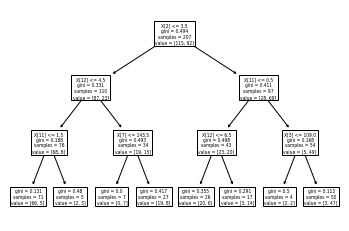

In [35]:
tree.plot_tree(model_gini.fit(X_train, y_train)) 

[Text(167.4, 190.26, 'X[2] <= 3.5\nentropy = 0.991\nsamples = 207\nvalue = [115, 92]'),
 Text(83.7, 135.9, 'X[12] <= 4.5\nentropy = 0.74\nsamples = 110\nvalue = [87, 23]'),
 Text(41.85, 81.53999999999999, 'X[7] <= 164.5\nentropy = 0.485\nsamples = 76\nvalue = [68, 8]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.722\nsamples = 40\nvalue = [32, 8]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0]'),
 Text(125.55000000000001, 81.53999999999999, 'X[7] <= 143.5\nentropy = 0.99\nsamples = 34\nvalue = [19, 15]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.877\nsamples = 27\nvalue = [19, 8]'),
 Text(251.10000000000002, 135.9, 'X[11] <= 0.5\nentropy = 0.867\nsamples = 97\nvalue = [28, 69]'),
 Text(209.25, 81.53999999999999, 'X[12] <= 6.5\nentropy = 0.996\nsamples = 43\nvalue = [23, 20]'),
 Text(188.32500000000002, 27.180000000000007, 'entropy = 0.779\nsamples 

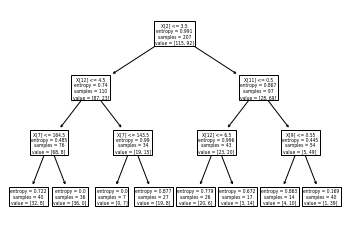

In [36]:
# tree.plot_tree(model_entropy.fit(df, df["status"]))
tree.plot_tree(model_entropy.fit(X_train, y_train))

In [37]:
from sklearn.tree.export import export_text

r = export_text(model_gini, feature_names=list(X_train.columns))
print(r)

|--- cp <= 3.50
|   |--- thal <= 4.50
|   |   |--- ca <= 1.50
|   |   |   |--- class: 0
|   |   |--- ca >  1.50
|   |   |   |--- class: 1
|   |--- thal >  4.50
|   |   |--- thalach <= 143.50
|   |   |   |--- class: 1
|   |   |--- thalach >  143.50
|   |   |   |--- class: 0
|--- cp >  3.50
|   |--- ca <= 0.50
|   |   |--- thal <= 6.50
|   |   |   |--- class: 0
|   |   |--- thal >  6.50
|   |   |   |--- class: 1
|   |--- ca >  0.50
|   |   |--- trestbps <= 109.00
|   |   |   |--- class: 0
|   |   |--- trestbps >  109.00
|   |   |   |--- class: 1

